
### 预训练模型在Jetson nano上运行推理

#### VEX AI 机器人竞赛 (VAIRC)为什么要使用预训练模型在Jetson nano上实现推理运行



预训练模型（Pre-trained Model）是指在大规模数据集上经过训练的模型，然后将其用于特定任务的模型。<br>
预训练模型的核心思想是通过在大量通用数据上进行训练，使模型学习到丰富的特征表示和知识，然后在这些基础上进行微调（Fine-tuning）以适应特定任务。<br>
优势：<br>
减少训练时间：预训练模型已经在大量数据上训练过，具备了良好的初始权重，因此在特定任务上的微调训练时间大大减少。<br>
提高性能：由于预训练模型已经学到了丰富的特征表示和知识，它们在特定任务上通常表现出色。<br>
数据效率：对于有标注数据较少的任务，预训练模型通过迁移学习可以更好地利用有限的数据。<br>
应用领域：
预训练模型广泛应用于自然语言处理、计算机视觉等领域。以下是一些常见的应用：

自然语言处理：BERT、GPT-3、RoBERTa等预训练模型在文本分类、情感分析、机器翻译、文本生成等任务中表现优异。<br>
计算机视觉：VGG、ResNet、Inception等预训练模型在图像分类、目标检测、图像分割等任务中广泛应用。<br>
工作流程：<br>
预训练：在大规模无监督或弱监督数据集上训练模型，使其学习到通用的特征表示。例如，在大规模文本数据上训练BERT模型。<br>
微调：在特定任务的标注数据上进行微调，使模型适应特定任务。例如，使用分类任务的数据对预训练的BERT模型进行微调。<br>
例如：<br>
ResNet（Residual Networks）：<br>
预训练：在ImageNet数据集上进行有监督训练，学习到丰富的图像特征表示。<br>
微调：在具体的图像分类任务上进行有监督微调。<br>
GPT（Generative Pre-trained Transformer）也包含了预训练模型的技术内容。<br>
预训练模型是通过在大规模数据集上进行训练，然后将其应用到特定任务的机器学习模型。<br>
在提高训练效率、减少计算资源消耗、提升模型性能等方面具有显著优势。通过预训练和微调(Fine-tuning)，预训练模型能够在各种任务中实现良好的表现。<br>

在Jetson Nano边缘计算装置上使用外部预训练模型有许多优势，特别是在资源受限的环境中进行高效的人工智能计算。以下是一些关键优势：<br>
节省训练时间和计算资源：<br>
预训练模型已经在大规模数据集上进行过训练，因此可以直接用于推理任务。这大大减少了训练时间和计算资源的需求，适合Jetson Nano这样的低功耗设备。<br>
高效的实时处理：<br>
Jetson Nano具有GPU加速能力，能够高效运行深度学习模型。使用预训练模型可以在边缘设备上实现实时处理，如视频流分析、图像分类和目标检测等。使用NVIDIA TensorRT实现高速推理，避免安装PyTorch或TensorFlow等开发框架，占据计算资源。<br>
降低数据需求：<br>
预训练模型已经在大量数据上进行了训练，能够很好地泛化。这意味着在进行特定任务的微调时，只需要少量的专用数据即可达到较好的性能，适合数据受限的应用场景。<br>
灵活的模型部署：<br>
预训练模型通常是模块化的，可以根据具体应用进行裁剪和优化。这使得在Jetson Nano上部署更加灵活，能够根据实际需求调整模型大小和复杂度。<br>
增强边缘设备智能化：<br>
使用预训练模型可以在边缘设备上实现复杂的AI功能，如智能监控、自动驾驶辅助、机器人导航等，增强设备的智能化和自主性。<br>
降低开发成本和时间：<br>
预训练模型提供了高质量的基线模型，开发者可以在其基础上进行微调和优化，显著降低开发成本和时间，提高开发效率。<br>
许多预训练模型（如ResNet、MobileNet、YOLO等）都有广泛的社区支持和丰富的资源（如开源代码、教程、文档等），有助于开发者快速上手和解决问题。<br>
优化的性能和能效比：<br>
预训练模型经过精心设计和优化，能够在Jetson Nano这样的低功耗设备上以较低的能耗实现较高的性能，延长设备的续航时间。<br>
总结来说，在Jetson Nano边缘计算装置上使用外部预训练模型，不仅能够提高开发效率和部署灵活性，还能在资源受限的环境中实现高效的实时AI计算，为边缘设备带来强大的智能化功能。<br>

作为VAIRC编程人员的参考资料，讨论在Jetson nano上如何实现预训练模型有效运行的技术专题，首先在普通个人计算机(windows、macOS)上自己训练一个可以工作的模型，然后移植到Jetson nano环境工作。对不熟悉神经网络编程和模型训练的读者，是对这些知识的一次简单了解和学习。如何让完成训练的模型能在Jetson nano运行是本专题的实现的目标。<br>
外部预训练模型针对特定任务的微调(Fine-tuning)涉及更多模型开发的知识和编程技能，将作为下一专题详细讨论。<br>

所谓利用外部设备训练，可以使用普通的个人计算机,无论是安装了windows或macOS，有无GPU均可用来训练Jetson nano上运行的网络。<br>
考虑到读者在阅读本文时如果能够同时运行讲述的程序，对于内容的理解会很有帮助，本文以.ipynb文件格式写就，在配置了必要的运行环境的条件下，可以一边阅读一边运行程序，以提高学习的效率和兴趣。<br>
前面提到在常用的PC计算机上需要适当配置才能运行，是指需要安装程序的编辑器、python编译程序和PyTorch运行环境，运行环境的安装将在《安装运行环境.mod》说明，也可以在网上自行查找环境安装方法。<br>
当然也可以选用TensorFlow环境，虽两者语法规则不同，风格各异，确均运行于Python环境，算法实质并无大异，都是当今流行的主力开发平台。业内某些未必公正的评价认为PyTorch较为直观明晰，对初学者友好，所以这里选用了PyTorch。<br>
本文介绍的程序需要分别在两种环境中运行(网络模型的训练使用外部的PC计算机，模型推理程序运行于Jetson nano平台)，文中会给出红字体运行环境的提示，希望执行程序过程中加以注意。<br>
下边我们就开始手写体数字识别神经网络的训练程序叙述，采用边程序边叙述的方法讲解。<br>

本文将以神经网络发展历史中经典的手写数字识别神经网络(MNIST)的训练、推理为例，介绍深度学习神经网络的训练的方法，并向没有神经网络模型训练经验的初学者简单讲解PyTorch开发平台上进行训练的程序运行流程，没能深入讨论涉及Python和Pytorch编程规则和语法解释。如果需要请自行通过其他资料学习。


 </p>
 <span style="color: red;">提示：以下的程序段均在外部设备上(windoes、macOS计算机)上运行，直到另有其他提示。
 <span>

### 一.手写体数字识别网络的训练

In [1]:

print('-------------训练开始')

-------------训练开始


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

导入必要的库函数：<br>
torch是PyTorch的库函数,PyTorch开发框架对python编程环境的支持是以调用torch库函数实现的。<br>
torchvision是PyTorch的一个子库，用于处理图像和视频数据。<br>
matplotlib 是一个 Python 的 2D 绘图库，它提供了大量的绘图工具，可以用于 Python 脚本、Jupyter 笔记本、Web 应用程序服务器和四个图形用户界面工具包。matplotlib 是基于 Python 的开源项目。<br>


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


检查是否可以使用GPU。如果计算机装置了GPU硬件并正确安装GPU驱动程序，程序自动在GPU环境中运行，否则，在CPU硬件环境运行程序。<br>

In [4]:
# 超参数
batch_size = 64
learning_rate = 0.01
num_epochs = 10


超参数是在开始学习过程之前设置值的参数，超参数的选择会直接影响到机器学习模型的性能和行为，需要在训练过程之前由用户或算法开发者设定。<br>
设定超参数：<br>
batch_size：在机器学习和深度学习中，batch_size是指在训练过程中一次迭代所使用的训练样本数量。它是一个重要的超参数，对模型的训练效率和效果都有直接影响。<br>
learning_rate：在机器学习和深度学习中，learning rate（学习率）是一个关键的超参数，用于控制在训练过程中模型参数更新的速度。学习率的值决定了在每次迭代中参数改变的幅度。具体来说，学习率决定了在梯度下降过程中，权重更新步长的大小。<br>
num_epochs：在机器学习和深度学习中，num_epochs（即 epochs 数）是指完整地通过整个训练数据集进行一次训练的次数。理解 num_epochs 对于掌握训练过程的优化和模型的性能至关重要。<br>

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

在机器学习和图像处理中，需要对图像进行预处理，它使用了 PyTorch 的 transforms 模块。这里通过 transforms.Compose 创建了一个变换序列，这些变换会按顺序应用到图像数据上。具体来说，它包含了两个步骤：<br>
transforms.ToTensor()：这个变换将 PIL 图像或者 NumPy 数组转换成 PyTorch 张量。它会改变数据格式，从 H x W x C（高度 x 宽度 x 通道）变为 C x H x W（通道 x 高度 x 宽度），并且将数据类型从 uint8（取值范围是 0-255）转换为 float32（取值范围是 0.0-1.0）。这一步是数据准备的重要部分，因为 PyTorch 模型通常预期输入是张量形式。<br>
transforms.Normalize((0.5,), (0.5,))：这个变换进行数据标准化，使得输入数据的均值和标准差达到指定值。这里的参数 (0.5,) 为均值，(0.5,) 为标准差。由于传入的是单通道的灰度图像（只有一个通道），所以这里只有一个值。这种标准化有助于模型训练，因为它确保了不同的输入特征在相同的尺度上，有利于梯度下降算法更快更稳定地收敛。<br>
这种预处理流程是机器学习中常用的技术，特别是在处理图像时，可以帮助提高模型的性能和训练速度。<br>  

执行下一段程序前，在当前目录里新建两个目录data和model。用于存放下载的训练数据和训练完成的网络模型。

 </p>
 <span style="color: yellow;">注意：如果没有data和model目录，程序执行将会出错。
 <span>

In [6]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

<img src="./手写数字图像.png" alt="Example Plot" style="width: 50%; height: auto;">

MNIST（Modified National Institute of Standards and Technology）数据集是一个经典的手写数字数据集，广泛用于机器学习和深度学习的研究和教育中，通常用于计算机视觉和机器学习的入门训练和测试。它包含 28x28 像素的灰度图像，代表了数字 0 到 9。MNIST 数据集分为训练集和测试集，具体数量如下：<br>
训练集：60,000 张图像<br>
测试集：10,000 张图像<br>
每张图像都是一个单通道的灰度图像，像素值范围在 0 到 255 之间。通常，在使用时会将像素值归一化到 0 到 1 或 -1 到 1 之间。如上图所示。<br>

这段代码是使用 PyTorch 框架来加载和准备 MNIST 数据集的典型方式。以下是对这些代码的详细解释：<br>

加载数据集<br>

创建数据集对象：<br>
datasets.MNIST() 函数从 torchvision 库中被调用来加载 MNIST 数据集。<br>
root='./data' 指定了数据存储的本地路径。如果指定路径下没有数据集，则会从网络下载。<br>
train=True 和 train=False 分别表示加载的是训练集和测试集。<br>
transform=transform 应用预定义的转换（例如，转换为张量并进行标准化），这些转换在数据加载时被应用于每个图像。<br>
download=True 允许自动从互联网下载数据，如果本地没有数据的话。
创建 DataLoader<br>
配置 DataLoader：<br>
torch.utils.data.DataLoader() 用于创建一个可迭代的数据加载器，这使得在训练和测试模型时可以批量地加载数据。<br>
dataset=train_dataset 和 dataset=test_dataset 分别指定了数据来源。<br>
batch_size=batch_size 有超参数指定了每个批次加载的图像数量。这个值影响模型训练的内存消耗和速度。<br>
shuffle=True 和 shuffle=False 分别用于指定训练数据集在每个训练周期开始时是否随机打乱。对训练数据进行打乱可以帮助减少模型过拟合，而测试数据通常不需要打乱。<br>
通过设置这些参数，这段代码有效地准备了用于训练和测试的数据流，确保数据在进入模型前已经被适当处理和批量化。这样的数据处理流程是实现有效深度学习模型的关键步骤之一。<br>

In [7]:
# 定义模型
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # Input channels, Output channels, Kernel size
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size, Stride
        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

这段代码定义了一个名为 ComplexNet 的深度学习模型，该模型基于 PyTorch 框架构建。这是一个卷积神经网络（CNN），通常用于处理图像数据。<br>
类定义和初始化<br>
ComplexNet 继承自 nn.Module，这是所有 PyTorch 神经网络的基类。<br>
在__init__ 方法中，定义了网络的各个层。这些层包括卷积层、池化层、全连接层（线性层）和一个 Dropout 层。<br>
(一)  层的构成<br>
1.卷积层<br>
self.conv1: 第一个卷积层，使用一个 3x3 的卷积核，输入通道为 1，输出通道为 32。使用 padding=1 以保持输入和输出的空间尺寸不变。<br>
self.conv2: 第二个卷积层，同样使用 3x3 卷积核，但输入通道增加至 32，输出通道为 64，保持相同的填充策略。<br>
2.池化层<br>
self.pool: 最大池化层，使用 2x2 的窗口对特征图进行下采样，步长为 2，这有助于减少数据的空间维度和参数数量，从而控制过拟合。<br>
3.全连接层<br>
self.fc1: 第一个全连接层，输入从卷积层通过展平操作得到的是 64*7*7 大小的特征，输出为 600。<br>
self.fc2: 第二个全连接层，进一步将特征从 600 维降至 120 维。<br>
self.fc3: 最后一个全连接层，将特征从 120 维降至 10 维，通常代表分类任务中的类别数。<br>
4.Dropout 层<br>
self.dropout: Dropout 层以 0.25 的概率丢弃部分神经元，这是防止过拟合的一种常用技术。<br>
(二)前向传播方法 forward<br>
forward 方法定义了数据如何通过这些层进行流动：<br>
数据首先通过 self.conv1 卷积层，接着是 ReLU 激活函数，然后通过池化层。<br>
经过第二个卷积层 self.conv2 和 ReLU 激活，再次经过池化层。<br>
池化后的数据需要被展平（flatten），以便作为全连接层的输入。<br>
展平后的数据通过三个全连接层（第一个经过 ReLU 激活和 Dropout，第二个仅经过 ReLU 激活），最后通过 self.fc3 输出最终结果。<br>
这样的网络结构适合进行图像分类任务，能够自动从原始像素中学习到有用的特征，最终进行分类判断。<br>

In [8]:
#实例化网络并移动到设备上：
#创建了ComplexNet的一个实例，并将其移动到了之前检测到的设备上（GPU或CPU）。
model = ComplexNet().to(device)
print('model建立')

model建立


    
创建了ComplexNet的一个实例，并将其移动到了之前检测到的设备上（GPU或CPU）。

In [9]:
# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

这段代码定义了用于训练神经网络的两个关键组件：损失函数和优化器，是 PyTorch 框架中常见的设置。<br>
损失函数：<br>
criterion = nn.CrossEntropyLoss()：
nn.CrossEntropyLoss() 是 PyTorch 中用于分类问题的交叉熵损失函数。<br>
这个函数结合了 nn.LogSoftmax() 和 nn.NLLLoss()（负对数似然损失）在一个单一的类中。它非常适合用于多类分类问题，其中类别是互斥的。<br>
这个损失函数期望模型的输出是原始的、未经 softmax 处理的分数（也称为 logits），并且标签应该是每个样本的类别索引。<br>
优化器：<br>
optimizer = optim.SGD(model.parameters(), lr=learning_rate) optim.SGD 是随机梯度下降（Stochastic Gradient Descent）的实现，是最基本的优化算法之一。<br>
model.parameters() 提供了模型中所有可训练参数的引用，这些参数将被优化器更新。<br>
lr=learning_rate 设定了学习率，这是控制参数更新步长的关键超参数。学习率的大小直接影响到训练过程中模型参数更新的速度和质量。<br>
这两个组件共同工作，使得在模型训练过程中，可以根据损失函数计算出的损失，通过优化器调整模型参数，以期望模型性能不断提升，损失值逐渐减小。在实际训练循环中，每个批次的数据会被用来计算损失，然后通过优化器更新模型权重。<br>

  
这段代码涉及使用 Python 的 matplotlib 库来实时更新和显示训练过程中的损失和准确率图表。这是数据科学和机器学习中常用的做法，可以帮助开发者直观地了解模型的训练进展和性能。下面是对代码中每部分的具体解释：

实时交互模式
plt.ion()：
plt.ion() 开启 matplotlib 的交互模式。在这个模式下，plt.show() 命令不会阻塞代码的执行，允许图表在显示的同时继续运行更新。
这对于实时更新图表（如在训练过程中动态显示损失和准确率变化）非常有用。
初始化图表
损失图表 (fig_loss, ax_loss)：

fig_loss, ax_loss = plt.subplots() 创建一个新的图表和坐标轴用于绘制损失值。
fig_loss 是图表对象，可以用来对图表进行全局设置，如图表大小、标题等。
ax_loss 是对应的坐标轴对象，用来具体绘制和设置图表中的元素，如线条样式、坐标轴标签、图例等。
准确率图表 (fig_acc, ax_acc)：

fig_acc, ax_acc = plt.subplots() 创建另一个图表和坐标轴用于绘制准确率。
这允许损失和准确率分别在不同的窗口中实时更新，使得两者的变化趋势可以分别观察，避免在单一图表中信息过载。
使用这种方式，你可以在模型训练的每个周期（epoch）或每个批次（batch）结束后更新这些图表，展示最新的训练统计信息。这对于调试模型和调整训练参数非常有帮助，因为你可以即时看到修改参数对模型性能的影响  

In [10]:
# 训练和评估
train_losses = []
train_accuracies = []


这段代码初始化了两个列表：train_losses 和 train_accuracies，用于存储在模型训练过程中每个迭代（通常是每个批次或每个周期）的损失和准确率。这样做可以跟踪和可视化训练过程中的性能变化，对于理解和调整模型非常重要。

Epoch 1, Loss: 1.3946, Accuracy:0.5956
Epoch 2, Loss: 0.2565, Accuracy:0.9230
Epoch 3, Loss: 0.1503, Accuracy:0.9548
Epoch 4, Loss: 0.1098, Accuracy:0.9667
Epoch 5, Loss: 0.0881, Accuracy:0.9734


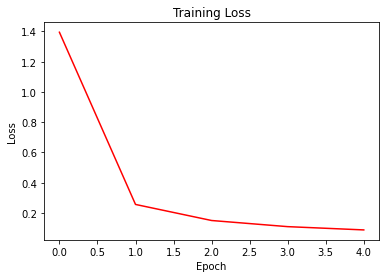

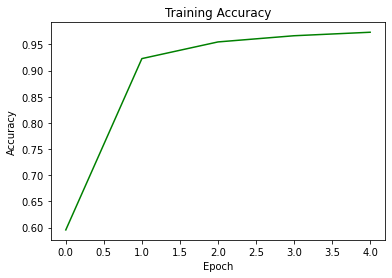

In [11]:
plt.ion()
# 初始化两个图表
fig_loss, ax_loss = plt.subplots()
fig_acc, ax_acc = plt.subplots()
with open('./model/training_log.txt', 'w') as f:
    num_epochs = 5
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        #------------------------------------------
            _,predicted = torch.max(outputs.data,1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
        #------------------------------------------

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct_predictions/total_predictions
            # 保存checkpoint
        checkpoint = {
            #'name': 'VAIC-MNISTComplexNet',
            #'maker': 'Lichengtong ',
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': running_loss / len(train_loader)
        }
        torch.save(checkpoint, f'./model/mnist_complex_net_checkpoint_epoch{epoch + 1}.pth')
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)
        print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy:{epoch_accuracy:.4f}')
        f.write(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}\n')

        #更新图表并保存训练结果：
        #在每个epoch结束后，更新图表以显示最新的损失和准确率，并在训练结束后保存图表为图片文件。
        ax_loss.clear()
        ax_loss.plot(train_losses, 'r-', label='Loss')
        ax_loss.set_title('Training Loss')
        ax_loss.set_xlabel('Epoch')
        ax_loss.set_ylabel('Loss')
        fig_loss.canvas.draw()
        ax_acc.clear()
        ax_acc.plot(train_accuracies, 'g-', label='Accuracy')
        ax_acc.set_title('Training Accuracy')
        ax_acc.set_xlabel('Epoch')
        ax_acc.set_ylabel('Accuracy')
        fig_acc.canvas.draw()


这段代码是一个训练循环，其中包括模型训练和记录训练日志到文件的过程。<br>
让我们详细解释这个脚本的每个部分和功能：<br>
文件记录<br>
使用 with open('./model/training_log.txt', 'w') as f 来打开一个文件，用于写入训练过程中的日志。这种方式确保了文件在代码块执行完毕后会被正确关闭。<br>
训练过程<br>
num_epochs = 5 设定了训练周期数为5，超参数在训练前是可以改动的。<br>
for epoch in range(num_epochs): 开始一个循环，每次循环代表一个训练周期。<br>
在每个周期中：
running_loss = 0.0 初始化累计的损失。<br>
correct_predictions = 0 和 total_predictions = 0 初始化用于计算准确率的计数器。<br>
对每个批次的处理：<br>
for i, data in enumerate(train_loader, 0): 从 train_loader 中迭代获取数据批次。<br>
inputs, labels = data[0].to(device), data[1].to(device) 将输入和标签转移到计算设备（如GPU）上。<br>
optimizer.zero_grad() 清除之前的梯度信息。<br>
outputs = model(inputs) 获取模型对当前批次的输出。<br>
loss = criterion(outputs, labels) 计算损失。<br>
loss.backward() 进行反向传播。<br>
optimizer.step() 根据梯度更新模型参数。<br>
running_loss += loss.item() 累加损失以计算平均损失。<br>
_, predicted = torch.max(outputs.data, 1) 获取预测结果。<br>
total_predictions += labels.size(0) 更新总预测数。<br>
correct_predictions += (predicted == labels).sum().item() 更新正确预测数。
计算和记录结果：<br>
epoch_loss = running_loss / len(train_loader) 计算本周期平均损失。<br>
epoch_accuracy = correct_predictions / total_predictions 计算本周期准确率。<br>
torch.save(checkpoint, f'./model/mnist_complex_net_checkpoint_epoch{epoch + 1}.pth')
这里，torch.save() 函数用于将checkpoint字典保存到磁盘。文件路径和名称是动态生成的，使用f-string（Python 3.6+的特性）来包含epoch号。这样，每个epoch的checkpoint都会被保存为一个单独的文件，文件名中包含了epoch号，使得在将来可以轻松地找到和加载特定的checkpoint。<br>
train_losses.append(epoch_loss) 和 train_accuracies.append(epoch_accuracy) 分别记录损失和准确率。<br>
print(...) 在控制台输出当前周期的结果。<br>

代码完整地展示了使用 PyTorch 进行神经网络训练的基本步骤，包括数据处理、模型训练、损失计算、反向传播、参数更新、结果计算和日志记录。通过记录文件，你可以随时查看训练过程中的详细性能变化，这对于调试和改进模型非常有帮助。<br>

代码涉及使用 Python 的 matplotlib 库来实时更新和显示训练过程中的损失和准确率图表。这是数据科学和机器学习中常用的做法，可以帮助开发者直观地了解模型的训练进展和性能。下面是对代码中每部分的具体解释：<br>
实时交互模式
plt.ion()：
plt.ion() 开启 matplotlib 的交互模式。在这个模式下，plt.show() 命令不会阻塞代码的执行，允许图表在显示的同时继续运行更新。<br>
这对于实时更新图表（如在训练过程中动态显示损失和准确率变化）非常有用。<br>
初始化图表<br>
损失图表 (fig_loss, ax_loss)：<br>
fig_loss, ax_loss = plt.subplots() 创建一个新的图表和坐标轴用于绘制损失值。<br>
fig_loss 是图表对象，可以用来对图表进行全局设置，如图表大小、标题等。<br>
ax_loss 是对应的坐标轴对象，用来具体绘制和设置图表中的元素，如线条样式、坐标轴标签、图例等。<br>
准确率图表 (fig_acc, ax_acc)：<br>
fig_acc, ax_acc = plt.subplots() 创建另一个图表和坐标轴用于绘制准确率。<br>
这允许损失和准确率分别在不同的窗口中实时更新，使得两者的变化趋势可以分别观察，避免在单一图表中信息过载。<br>
使用这种方式，你可以在模型训练的每个周期（epoch）或每个批次（batch）结束后更新这些图表，展示最新的训练统计信息。这对于调试模型和调整训练参数非常有帮助，因为你可以即时看到修改参数对模型性能的影响  <br>
每个训练周期结束后动态更新训练损失和准确率的图表，并在整个训练过程结束后将这些图表保存为图片文件。<br>
这是一个非常有用的过程，因为它可以帮助可视化模型的学习进度和性能变化。下面是对代码的详细解释：<br>
更新图表
在每个训练周期的末尾，图表被更新以反映最新的训练损失和准确率。具体步骤包括：<br>
清除旧的图表内容：使用 ax_loss.clear() 和 ax_acc.clear() 来清除之前的图表内容，这是为了在图表上描绘新的数据点之前移除旧的数据点。<br>
绘制新的数据：<br>
对于损失图表：使用 ax_loss.plot(train_losses, 'r-', label='Loss') 绘制损失数据，其中 'r-' 指定了线条颜色和样式（红色实线）。<br>
对于准确率图表：使用 ax_acc.plot(train_accuracies, 'g-', label='Accuracy') 绘制准确率数据，其中 'g-' 指定了线条颜色和样式（绿色实线）。<br>
设置图表标题和坐标轴标签：
为损失图表设置标题、X轴和Y轴标签。
为准确率图表做同样的设置。
重新绘制图表：使用 fig_loss.canvas.draw() 和 fig_acc.canvas.draw() 来触发图表的重绘，使更新的数据能够显示在图表上。
保存图表为图片文件
在整个训练过程结束后，你可以使用 fig_loss.savefig('training_loss.png') 和 fig_acc.savefig('training_accuracy.png') 将这些图表保存为图片文件。这样做不仅方便将训练结果文档化，也便于后续的分析和报告。
注意，上述保存图片文件的代码行应该在所有训练周期完成后执行，通常放在训练循环外部。
通过这种方式，你可以确保每次训练的结果都得到有效的记录和可视化，这是评估和比较模型性能的重要工具。


In [24]:
plt.ioff()
plt.show()
#保存图
fig_loss.savefig('fig_loss.png')
fig_acc.savefig('fig_acc.png')

------------show2
----------


关闭交互模式plt.ioff()：<br>
关闭了 matplotlib 的交互模式。开启交互模式(plt.ion())是为了让图表可以在训练过程中实时更新而不阻塞程序运行。一旦训练结束并且不再需要实时更新，你可以关闭交互模式以准备最终展示或保存静态图像。<br>
显示图表：<br>
plt.show()：此命令用于展示当前所有活动的 matplotlib 图窗。它通常在非交互模式下使用，以在程序执行完成后展示图形界面。当交互模式关闭后，使用这个命令可以确保用户有机会查看最终的图表。<br>
保存图表为图片：<br>
fig_loss.savefig('fig_loss.png') 和 fig_acc.savefig('fig_acc.png')：这两行代码将训练损失图表和训练准确率图表分别保存为 PNG 格式的图片文件。这是一个非常有用的功能，因为它允许你将图表保存下来，以便于报告或进一步分析。<br>
fig_loss.png 和 fig_acc.png 是文件的保存路径和名称。你可以根据需要修改这些参数，以保存在不同的位置或使用不同的文件名。<br>
通过这种方式，你不仅可以在屏幕上查看训练过程中的性能变化，还可以有永久的记录，这对于后续的评估和比较是非常有帮助的。<br>

In [25]:

print('----------训练结束')】

----------end


### 二. 手写体数字识别模型的验证

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

import numpy as np

# 设置随机种子以确保结果可复现
torch.manual_seed(0)
np.random.seed(0)

# 定义模型
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # Input channels, Output channels, Kernel size
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size, Stride
        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 检查是否有可用的GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 实例化模型
model = ComplexNet().to(device)
print('model建立')

model建立


这段代码与训练部分完全相同，如果是训练后立即验证，这部分代码可以不用再度执行。

推理错误的个数: 3 / 100


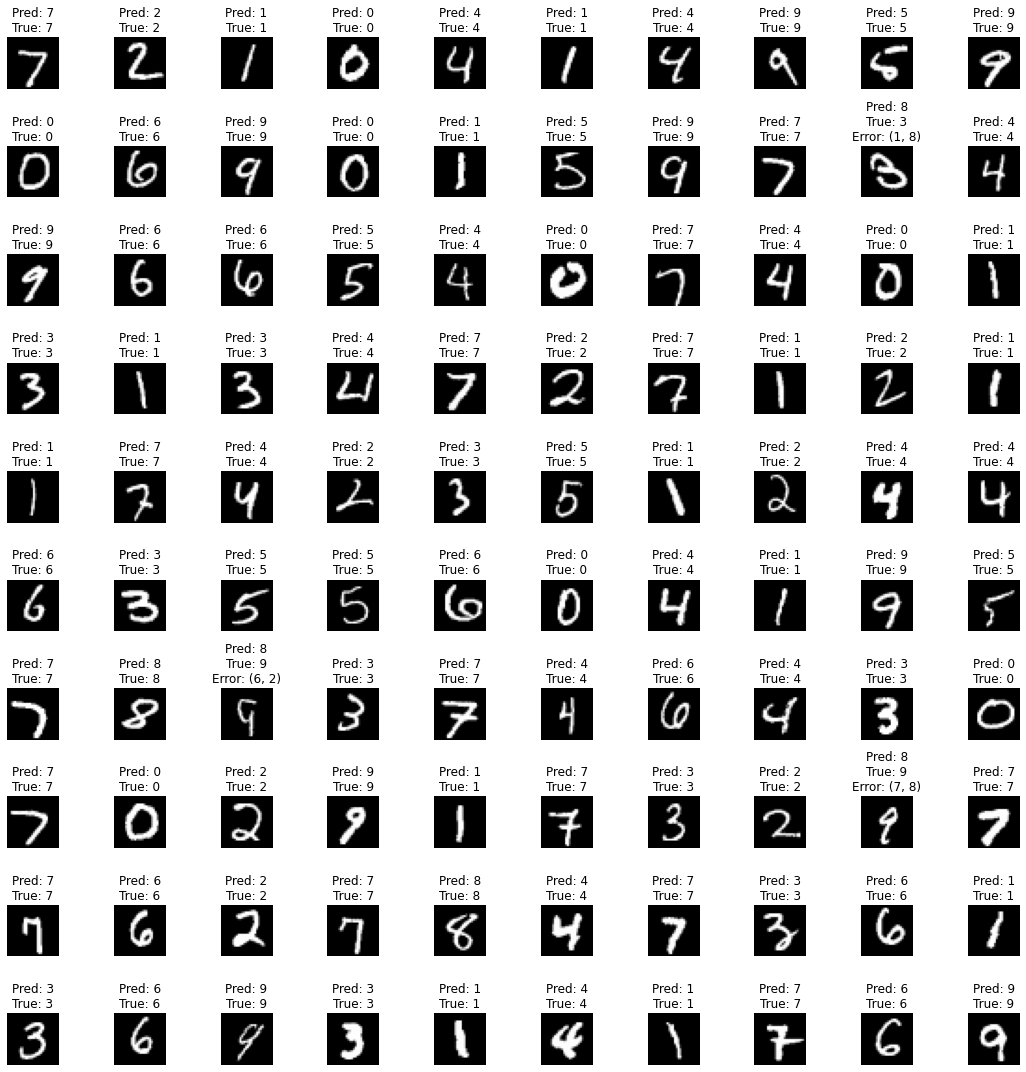

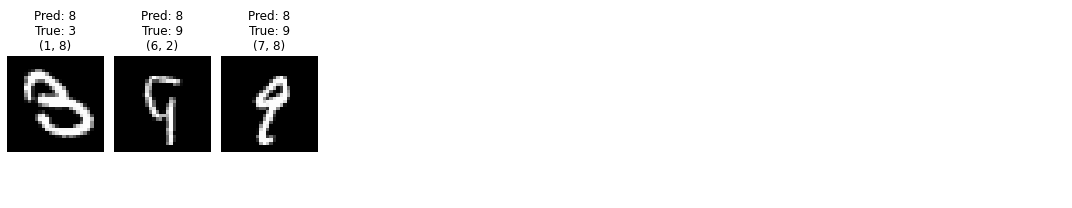

--------------验证结束


In [16]:

# 加载训练好的模型参数，只加载 model_state_dict 部分
checkpoint = torch.load('./model/mnist_complex_net_checkpoint_epoch50.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # 设置为评估模式

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载测试数据
test_size = 100
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=test_size, shuffle=False)
# 获取一个批次的数据
data, target = next(iter(test_loader))

# 将数据输入模型进行推理
data = data.to(device)
output = model(data)
pred = output.argmax(dim=1, keepdim=True)

# 计算推理错误的个数并记录错误的行列位置
incorrect = (pred.cpu() != target.view_as(pred)).sum().item()
incorrect_indices = (pred.cpu() != target.view_as(pred)).nonzero(as_tuple=True)[0]

print(f'推理错误的个数: {incorrect} / 100')

# 设置显示样本的网格
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
axs = axs.flatten()

# 显示每个样本及其预测结果
for i in range(test_size):
    axs[i].imshow(data[i].cpu().numpy().squeeze(), cmap='gray')
    title = f'Pred: {pred[i].item()}\nTrue: {target[i].item()}'
    if i in incorrect_indices:
        row, col = divmod(i, 10)
        title += f'\nError: ({row}, {col})'
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# 显示推理错误的图像
if incorrect > 0:
    rows = (incorrect // 10) + (1 if incorrect % 10 != 0 else 0)
    fig_error, axs_error = plt.subplots(rows, 10, figsize=(15, 3 * rows))
    axs_error = axs_error.flatten()

    for idx, error_idx in enumerate(incorrect_indices):
        axs_error[idx].imshow(data[error_idx].cpu().numpy().squeeze(), cmap='gray')
        row, col = divmod(error_idx.item(), 10)
        axs_error[idx].set_title(f'Pred: {pred[error_idx].item()}\nTrue: {target[error_idx].item()}\n({row}, {col})')
        axs_error[idx].axis('off')

    for ax in axs_error[incorrect:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    print('--------------验证结束')

### 三.网络从.pth格式转换为.onnx格式

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

这些导入语句包含了用于定义和训练神经网络的库（如 torch 和 torchvision），以及用于数据处理和可视化的库（如 numpy 和 matplotlib）。

In [22]:

class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # Input channels, Output channels, Kernel size
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size, Stride
        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

这里定义了一个卷积神经网络类 ComplexNet。这个网络包含两个卷积层、一个最大池化层和三个全连接层。每个卷积层后面都跟着一个ReLU激活函数和一个池化层。全连接层中间插入了一个Dropout层，以减少过拟合。<br>
此网络定义与训练时网络结构相同。<br>

In [23]:
# 检查是否有可用的GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

这段代码检查是否有可用的GPU，如果有则使用GPU，否则使用CPU。<br>

In [24]:
# 实例化模型
model = ComplexNet().to(device)
print('model建立---')

model建立---


实例化 ComplexNet 模型，确保与训练时的模型结构一致并将其移动到设备（CPU或GPU）上。<br>

In [28]:
# 加载训练好的模型参数，只加载 model_state_dict 部分
checkpoint_path = './model/mnist_complex_net_checkpoint_epoch5.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

# 打印 checkpoint 的所有键
print("Checkpoint keys:", checkpoint.keys())

# 打印模型的权重（仅打印部分权重示例）
print("Model weights:")
for name, param in model.named_parameters():
    if 'weight' in name:
        print(f"{name}: {param.data.shape}")

Checkpoint keys: dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'loss'])
Model weights:
conv1.weight: torch.Size([32, 1, 3, 3])
conv2.weight: torch.Size([64, 32, 3, 3])
fc1.weight: torch.Size([600, 3136])
fc2.weight: torch.Size([120, 600])
fc3.weight: torch.Size([10, 120])


读出训练好的模型参数文件 .pth，并将其加载到模型中。<br>
打印了 checkpoint 文件中的所有键以及部分权重信息，以验证加载是否成功。<br>

In [29]:
# 导出为 ONNX 格式
dummy_input = torch.randn(1, 1, 28, 28).to(device)  # MNIST 输入尺寸
onnx_path = './model/mnist_complex_net_li.onnx'
torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
)

print(f"Model has been exported to ONNX format at {onnx_path}.")

Model has been exported to ONNX format at ./model/mnist_complex_net_li.onnx.


使用 torch.onnx.export 将模型导出为 ONNX 格式，指定输入输出的名称和动态轴，以支持不同的批量大小。<br>

### 四.在Jetson Nano上利用TensorRT进行推理


 </p>
 <span style="color: red;">提示：以下程序段请在Jetson Nano边缘计算装置上运行。<br>
 <span>
 </p>
 <span style="color: white;">在执行下一段程序前，当前目录里新建两个目录data和model。将外部设备训练变换的.onnx文件复制到model目录里，也可以将外部设备上训练数据复制到data目录，省得Jetson运行时重新下载。<br>
 <span>
 


In [18]:
import tensorrt as trt
import pycuda.driver as cuda
import pycuda.autoinit
import numpy as np
import struct
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorrt'

In [ ]:
# TensorRT 日志记录器
TRT_LOGGER = trt.Logger(trt.Logger.WARNING)

# ONNX 模型路径
onnx_model_path = './model/mnist_complex_net.onnx'
engine_path = './model/mnist_complex_net.trt'

# 将 ONNX 模型转换为 TensorRT 引擎
def build_engine(onnx_file_path, engine_file_path):
    with trt.Builder(TRT_LOGGER) as builder, builder.create_network(1 << int(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH)) as network, trt.OnnxParser(network, TRT_LOGGER) as parser:
        builder.max_workspace_size = 1 << 30  # 1GB
        builder.max_batch_size = 1
        if not parser.parse_from_file(onnx_file_path):
            for error in range(parser.num_errors):
                print(parser.get_error(error))
            return None
        with builder.build_cuda_engine(network) as engine:
            with open(engine_file_path, "wb") as f:
                f.write(engine.serialize())
            return engine

# 构建引擎
engine = build_engine(onnx_model_path, engine_path)

这段代码定义了一个函数 build_engine，用于从 ONNX 模型文件构建 TensorRT 引擎。TensorRT 是 NVIDIA 提供的一个用于高性能深度学习推理（inference）的库。以下是代码的逐步解释：
函数定义:
def build_engine(onnx_file_path, engine_file_path):
定义了一个函数 build_engine，它接受两个参数：
onnx_file_path：ONNX 模型的文件路径。
engine_file_path：TensorRT 引擎将要保存的文件路径。
TensorRT 初始化:
with trt.Builder(TRT_LOGGER) as builder, ...:
这里使用 with 语句来确保 TensorRT 的资源（如 builder 和 network）在使用完毕后被正确释放。trt.Builder 是 TensorRT 的一个类，用于构建引擎。TRT_LOGGER 是一个日志记录器，用于记录 TensorRT 生成的日志。
同时，代码创建了一个 network 对象，该对象用于定义网络的拓扑结构。这里使用了 EXPLICIT_BATCH 标志，意味着网络将显式地处理批处理大小。
接下来，创建了一个 OnnxParser 对象，用于从 ONNX 模型文件中解析网络结构。
1. 设置 TensorRT 参数:
builder.max_workspace_size = 1 << 30  # 1GB  
builder.max_batch_size = 1
复制代码
* `max_workspace_size` 设置了 TensorRT 在执行网络时可以使用的最大 GPU 内存量（这里是 1GB）。  
* `max_batch_size` 设置了引擎的最大批处理大小（这里是 1）。
2. 解析 ONNX 模型:

if not parser.parse_from_file(onnx_file_path):  
    ...
使用 OnnxParser 的 parse_from_file 方法从指定的 ONNX 文件路径解析模型。如果解析失败，则打印出解析器中的错误。
1. 构建 TensorRT 引擎:

with builder.build_cuda_engine(network) as engine:  
    ...
使用 builder 的 build_cuda_engine 方法从之前定义的网络中构建 CUDA 引擎。
1. 保存和返回引擎:

with open(engine_file_path, "wb") as f:  
    f.write(engine.serialize())  
return engine
将构建的引擎序列化为字节数据，并保存到指定的文件路径中。此外，还返回了引擎对象，以便在需要时进一步使用。
调用函数:

engine = build_engine(onnx_model_path, engine_path)
通过提供 ONNX 模型的路径和要保存引擎的路径，调用 build_engine 函数来构建 TensorRT 引擎。
总之，这段代码的目的是从 ONNX 模型文件中构建 TensorRT 引擎，并将引擎保存到指定的文件路径中。

In [ ]:
# 定义数据集路径（假设是MNIST数据集）
mnist_image_path = './data/MNIST/raw/t10k-images-idx3-ubyte'
mnist_label_path = './data/MNIST/raw/t10k-labels-idx1-ubyte'

# 读取 MNIST 数据集
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, 1, rows, cols)
    return images

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# 加载图像和标签
images = load_mnist_images(mnist_image_path)
labels = load_mnist_labels(mnist_label_path)

# 选择若干图像进行推理（例如前10个）
num_images = 10
selected_images = images[:num_images]
selected_labels = labels[:num_images]

# 预处理图像
def preprocess_image(image):
    image = image.astype(np.float32)
    image /= 255.0  # 归一化
    return image


这段代码主要做了以下几件事情：
定义数据集路径：
设定了MNIST数据集中图像和标签的文件路径。
读取MNIST数据集：
定义了两个函数load_mnist_images和load_mnist_labels来分别读取MNIST数据集中的图像和标签。
使用struct.unpack来解析文件的前几个字节，这些字节包含了文件的一些元信息，如魔数（magic number，用于标识文件类型）和数据的数量、尺寸等。
使用np.fromfile读取文件剩余部分，并将其转换为NumPy数组。
对于图像，它们被重新整形为(num, 1, rows, cols)，其中num是图像的数量，1表示颜色通道（灰度图像），rows和cols分别是图像的行数和列数。
加载图像和标签：
调用上面定义的函数来加载图像和标签。
选择若干图像进行推理：
设定了一个变量num_images来选择前多少个图像进行推理。
使用切片操作从整个数据集中选择前num_images个图像和对应的标签。
预处理图像：
定义了一个函数preprocess_image来预处理图像。
将图像的数据类型从np.uint8转换为np.float32。
将图像的像素值从0-255的范围归一化到0-1的范围。
解释程序中的关键部分
struct.unpack：
这是一个Python的struct模块中的函数，用于解析打包的二进制数据。这里，它用于从文件的前几个字节中提取出元信息。
np.fromfile：
NumPy库中的一个函数，用于从文件中读取二进制数据，并将其直接转换为NumPy数组。
reshape：
NumPy数组的一个方法，用于改变数组的形状。这里，它将一维数组（由np.fromfile读取）重新整形为四维数组，以匹配MNIST图像的尺寸和颜色通道数。
归一化：
归一化是一种常见的图像预处理步骤，它将图像的像素值从原始范围（通常是0-255）转换到另一个范围（在这里是0-1）。这有助于机器学习模型更好地学习图像特征，因为不同的输入特征具有相似的尺度。
astype：
NumPy数组的一个方法，用于更改数组的数据类型。在这里，它将图像的数据类型从np.uint8（无符号8位整数）更改为np.float32（32位浮点数）。



In [ ]:


# 加载 TensorRT 引擎
def load_engine(engine_file_path):
    with open(engine_file_path, "rb") as f, trt.Runtime(TRT_LOGGER) as runtime:
        return runtime.deserialize_cuda_engine(f.read())

engine = load_engine(engine_path)
context = engine.create_execution_context()

# 准备输入和输出缓冲区
input_shape = (1, 1, 28, 28)
output_shape = (1, 10)  # 假设是10个类别的分类
input_data = np.zeros(input_shape, dtype=np.float32)
output_data = np.empty(output_shape, dtype=np.float32)

d_input = cuda.mem_alloc(input_data.nbytes)
d_output = cuda.mem_alloc(output_data.nbytes)
bindings = [int(d_input), int(d_output)]

# 推理并显示结果
for i in range(num_images):
    image = preprocess_image(selected_images[i])
    cuda.memcpy_htod(d_input, image)

    # 进行推理
    context.execute_v2(bindings)

    cuda.memcpy_dtoh(output_data, d_output)
    predicted_label = np.argmax(output_data)
    true_label = selected_labels[i]

    # 显示图像和推理结果
    plt.imshow(image[0], cmap='gray')
    plt.title(f'Predicted: {predicted_label}, True: {true_label}')
    plt.axis('off')
    plt.show()

这段代码的主要目的是使用TensorRT来加载一个预先序列化的TensorRT引擎，并使用该引擎对MNIST数据集中的图像进行推理。下面是对该代码的逐行解释：
加载 TensorRT 引擎：

def load_engine(engine_file_path):  
    with open(engine_file_path, "rb") as f, trt.Runtime(TRT_LOGGER) as runtime:  
        return runtime.deserialize_cuda_engine(f.read())
这定义了一个函数load_engine，它打开一个包含TensorRT引擎的文件，并使用TensorRT运行时（trt.Runtime）反序列化该文件以加载引擎。这里假设trt是TensorRT库的别名，并且TRT_LOGGER是一个已定义的日志记录器。
加载引擎并创建执行上下文：

engine = load_engine(engine_path)  
context = engine.create_execution_context()
这两行代码首先调用load_engine函数来加载TensorRT引擎，然后为该引擎创建一个执行上下文。
准备输入和输出缓冲区：

input_shape = (1, 1, 28, 28)  
output_shape = (1, 10)  # 假设是10个类别的分类  
input_data = np.zeros(input_shape, dtype=np.float32)  
output_data = np.empty(output_shape, dtype=np.float32)
这里定义了输入和输出的形状，并初始化了对应的NumPy数组。input_data用于存储输入图像数据，而output_data用于存储推理结果。
分配CUDA设备内存并设置绑定：
python
复制代码
d_input = cuda.mem_alloc(input_data.nbytes)  
d_output = cuda.mem_alloc(output_data.nbytes)  
bindings = [int(d_input), int(d_output)]
这里使用CUDA库（假设cuda是CUDA库的别名）为输入和输出数据分配设备内存。然后，创建一个绑定列表，该列表将主机内存（input_data和output_data）与设备内存（d_input和d_output）关联起来。
推理并显示结果：
python
复制代码
for i in range(num_images):  
    image = preprocess_image(selected_images[i])  
    cuda.memcpy_htod(d_input, image)  
  
    # 进行推理  
    context.execute_v2(bindings)  
  
    cuda.memcpy_dtoh(output_data, d_output)  
    predicted_label = np.argmax(output_data)  
    true_label = selected_labels[i]  
  
    # 显示图像和推理结果  
    plt.imshow(image[0], cmap='gray')  
    plt.title(f'Predicted: {predicted_label}, True: {true_label}')  
    plt.axis('off')  
    plt.show()
这个循环遍历选定的图像数量（num_images）。对于每个图像，它首先进行预处理，然后将预处理后的图像从主机内存复制到设备内存。接着，它使用TensorRT的执行上下文对图像进行推理。推理完成后，它将结果从设备内存复制回主机内存，并找到预测概率最高的类别作为预测标签。最后，它使用Matplotlib库（假设plt是Matplotlib的别名）显示原始图像和推理结果。
注意：在实际应用中，可能还需要处理各种错误和异常情况，以及优化性能（例如，通过批量处理图像或使用流来重叠数据传输和计算）。此外，还需要确保CUDA和TensorRT库已正确安装，并且代码中的所有导入和依赖项都已满足。